In [9]:
import os

import getpass
from pathlib import Path, PureWindowsPath # please check this medium article!! https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
import pandas as pd


if getpass.getuser() == 'Konrad':
    project_dir = Path(PureWindowsPath('D:\\DeepLearningProject'))
elif getpass.getuser() == 'fruechtnicht':
    project_dir = Path('/Users/fruechtnicht/NOVA/M.Sc_Data_Science_and_Advanced_Analytics/Semester2/Deep_Learning/Project/project_dir')
elif getpass.getuser() == 'dominika.leszko':
    project_dir = Path(r'C:\Users\dominika.leszko\Desktop\NOVAIMS\SEMESTER2\Deep Learinng\PROJECT\git_repo')
else:
    raise ValueError('Check you own user name and add proper elif statement !!!')
# if you have a windows computer please specify your project path as Konrad, if not as fruechtnicht
print(project_dir)
print(os.chdir(project_dir/ Path('log')))

/Users/fruechtnicht/NOVA/M.Sc_Data_Science_and_Advanced_Analytics/Semester2/Deep_Learning/Project/project_dir
None


In [ ]:
dirpath = os.getcwd()
print("current directory is : " + dirpath)

In [ ]:
targets = [
            'ethnic'
            , 
            'age'
            ,
            'gender'
            ]

In [ ]:
import pandas as pd 
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set(rc={'figure.figsize':(24,16)})
sns.set_style("white")
sns.set_palette("Reds")

variables = ['nr_of_channel', 'kernel_size', 'stride', 'hidden_neurons']

for target in targets:
    
    for variable in variables:
        final = pd.DataFrame()
        for file in glob.glob("*testing_"+target+"_"+variable+"_*"):
            seed = re.search("\d(?=(_training\.csv))", file).group(0)  
            value = re.search("\d*(?=(_\d*_training\.csv))", file).group(0)  
            df = pd.read_csv(file)
            df[variable]= int(value)
            df['seed']= int(seed)
            final = pd.concat([final,df], axis=0)

        if target == 'age':
            metric = 'val_mean_absolute_error'
        else: 
            metric = 'val_acc'


        n_colors = len(final[variable].unique())

        colors = ['#76b39d','#9c2c2c','#265069','#f59154']
        palette = colors[:n_colors]

        if metric == 'val_mean_absolute_error':

            final[metric] *= -1


        ax = sns.lineplot(x="epoch", y=metric, data=final, hue=variable, linewidth=5.0,legend="full", palette=palette)
        ax.set_title('Performance with different '+variable+ " for "+target, fontsize=40)
        ax.set_xlabel("Epoch",fontsize=40)
        ax.set_ylabel(metric,fontsize=40)
        ax.tick_params(labelsize=45)
        leg = ax.legend(frameon=False, loc='best',ncol=1, fontsize=40,markerscale=5)


        for line in leg.get_lines():
            line.set_linewidth(20.0)
        fig = ax.get_figure()
        plt.savefig(variable+'_'+target+'.png')
        plt.close()



In [10]:
import re
import pandas as pd 
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(24,16)})
sns.set_style("white")
sns.set_palette("Reds")

variables = ['2ConvPool', '4ConvPool', 'ConvConvPool']

for target in targets:
    final = pd.DataFrame()
    
    for variable in variables:
        inter = pd.DataFrame()
        for file in glob.glob("*testing_"+target+"_"+variable+"_*"):
            seed = re.search("\d(?=(_training\.csv))", file).group(0)  
            # no parameter value value = re.search("\d*(?=(_\d*_training\.csv))", file) 
            variable = re.search("(?<="+target+"_).*(?=(_\d*_training\.csv))", file).group(0)
            df = pd.read_csv(file)
            df['seed']= int(seed)
            df['Convolution']= str(variable)
            
            inter = pd.concat([inter,df], axis=0)
        final = pd.concat([final,inter], axis=0)
    print(final)

    if target == 'age':
        metric = 'val_mean_absolute_error'
    else: 
        metric = 'val_acc'


    colors = ['#76b39d','#9c2c2c','#265069','#f59154']
    palette = colors[:3]
    
    if metric == 'val_mean_absolute_error':
        
        final[metric] *= -1
        
    ax = sns.lineplot(x="epoch", y=metric, data=final, hue='Convolution', linewidth=5.0,legend="full", palette=palette)
    ax.set_title('Performance with different architectures for '+target, fontsize=40)
    ax.set_xlabel("Epoch",fontsize=40)
    ax.set_ylabel(metric,fontsize=40)
    ax.tick_params(labelsize=45)
    leg = ax.legend(frameon=False, loc='best',ncol=1, fontsize=40,markerscale=5)


    for line in leg.get_lines():
            line.set_linewidth(20.0)
    
    fig = ax.get_figure()
    plt.savefig('Architecture'+'_'+target+'.png')
    plt.close()

Empty DataFrame
Columns: []
Index: []


ValueError: Could not interpret input 'epoch'

# Comparing models## RANK

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
mod1=pd.read_excel('pred_mod1.xlsx')
mod2=pd.read_excel('pred_mod2.xlsx')
mod3=pd.read_excel('pred_mod3.xlsx')
mod4=pd.read_excel('pred_mod4.xlsx')


n_preds=mod1.shape[0]

for mod in [mod1, mod2, mod3, mod4]:
    mod.columns=['gen_true', 'gen_pred', 'ethnic_true', 'ethnic_pred', 'age_true', 'age_pred']

In [ ]:
for mod in [mod1, mod2, mod3, mod4]:
    mod['gen_score']=np.where(mod['gen_true']==mod['gen_pred'], 1, 0)
    mod['ethnic_score']=np.where(mod['ethnic_true']==mod['ethnic_pred'], 1, 0)
    mod['age_score']=np.abs(mod['age_true']-mod['age_pred'])
    

In [ ]:
for mod in [mod1, mod2, mod3, mod4]:
    mod.drop(columns=['gen_true', 'gen_pred', 'ethnic_true', 'ethnic_pred', 'age_true', 'age_pred'], axis=1, inplace=True)

In [ ]:
final_table=pd.DataFrame(columns=['gen_rank', 'ethnic_rank', 'age_rank'])
final_table

In [ ]:
for mod in [mod1, mod2, mod3, mod4]:
    final_table=final_table.append({'gen_rank':np.sum(mod['gen_score']), 'ethnic_rank':np.sum(mod['ethnic_score']),
                        'age_rank':np.average(mod['age_score'])}, ignore_index=True)

final_table_bkp=final_table.copy()

In [ ]:
final_table['gen_rank']=final_table['gen_rank'].rank()
final_table['ethnic_rank']=final_table['ethnic_rank'].rank()
final_table['age_rank']=final_table['age_rank'].rank()
final_table=np.floor(final_table)
final_table.index=['Model_1','Model_2','Model_3','Model_4']
final_table

#ATTENTON! 1 means worst 4 means best! for plotting purposes

#COLORMAP:
#['#FF9473', '#FFE6AC', '#97C977', '#639B94', '#3E757D']

In [ ]:
final_table=pd.read_excel(r'pred_results.xlsx', sheet_name='rank')
final_table.index=final_table['Model']
final_table

In [ ]:
sns.set_style('whitegrid')
final_table.plot(kind='bar', stacked=True, color=['#5A8D87','#E98769','#89B76C'])
plt.title('Models performance on various targets', fontsize=40)
plt.ylabel('Ranking', fontsize=35)
plt.xlabel('')
plt.xticks(fontsize=30, rotation='horizontal')
plt.legend(loc=2, prop={'size': 20})
plt.savefig('rank_compare.png')

# Radar Chart

In [ ]:
final_table_bkp=pd.read_excel(r'pred_results.xlsx', sheet_name='radar')
final_table_bkp.index=final_table['Model']
final_table_bkp.drop(columns=['Model'], axis=1, inplace=True)
final_table_bkp

In [ ]:
data=final_table_bkp.copy()
Attributes=list(data)
AttNo=len(Attributes)
values = data.iloc[2].tolist()#Transfer_learn
values += values [:1]
values2 = data.iloc[1].tolist()#Separate_conv
values2 += values2 [:1]
values3 = data.iloc[0].tolist()#Common_conv
values3 += values3 [:1]
#values4=data.iloc[0].tolist()
#values4+=values4[:1]
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

In [ ]:
def createRadar(player, data, color):
    Attributes = ["Age","Gender","Race"]
    
    data += data [:1]
    
    angles = [n / 3 * 2 * pi for n in range(3)]
    angles += angles [:1]
    
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes, fontsize=30, fontweight='bold')
    ax.plot(angles,data)
    ax.fill(angles, data, color, alpha=0.3)

    ax.set_title(player, fontsize=40)
    ax.set_ylim(top=0.8)
    plt.show()

In [ ]:
def createRadar4(player, data, player2, data2, player3, data3):
    Attributes = ["Age","Gender","Race"]
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 100}

    
    
    data += data[:1]
    data2 += data2[:1]
    data3 += data3[:1]
    
    angles = [n / 3 * 2 * pi for n in range(3)]
    
    angles += angles [:1]
    
    angles2 = [n / 3 * 2 * pi for n in range(3)]
    angles2 += angles2 [:1]
    
    angles3 = [n / 3 * 2 * pi for n in range(3)]
    angles3 += angles3 [:1]

    
    ax = plt.subplot(111, polar=True)

    #Create the chart as before, but with both Ronaldo's and Messi's angles/values
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes, fontsize=30, fontweight='bold')

    ax.plot(angles,values, color='#9c2c2c')
    ax.fill(angles, values, '#9c2c2c', alpha=0.3)

    ax.plot(angles2,values2, color='#76b39d')
    ax.fill(angles2, values2, '#76b39d', alpha=0.3)
    
    ax.plot(angles3,values3, color='#265069')
    ax.fill(angles3, values3, '#265069', alpha=0.3)
    plt.rc('font', **font)
    
    
    #Rather than use a title, individual text points are added
    
    plt.figtext(0.2,0.9,player,color="#9c2c2c", fontweight='bold', fontsize=25)
    plt.figtext(0.2,0.8,player2,color="#76b39d", fontweight='bold', fontsize=25)
    plt.figtext(0.2,0.7,player3,color="#265069", fontweight='bold', fontsize=25)
    plt.savefig('Radar_plot.png')
    plt.show()

In [ ]:
createRadar4("Common_conv", [0.42, 0.68, 0.45], 'Separate_conv', [0.44, 0.8, 0.55],'Transfer_learn', [0.13, 0.53, 0.41])

In [ ]:
createRadar("Common_conv", [0.42, 0.68, 0.45], color='#265069')

In [ ]:
createRadar("Separate_conv", [0.44, 0.8, 0.55], color='#76b39d')

In [ ]:
createRadar("Transfer_learn", [0.13, 0.53, 0.41], color='#9c2c2c')

# Error Plot


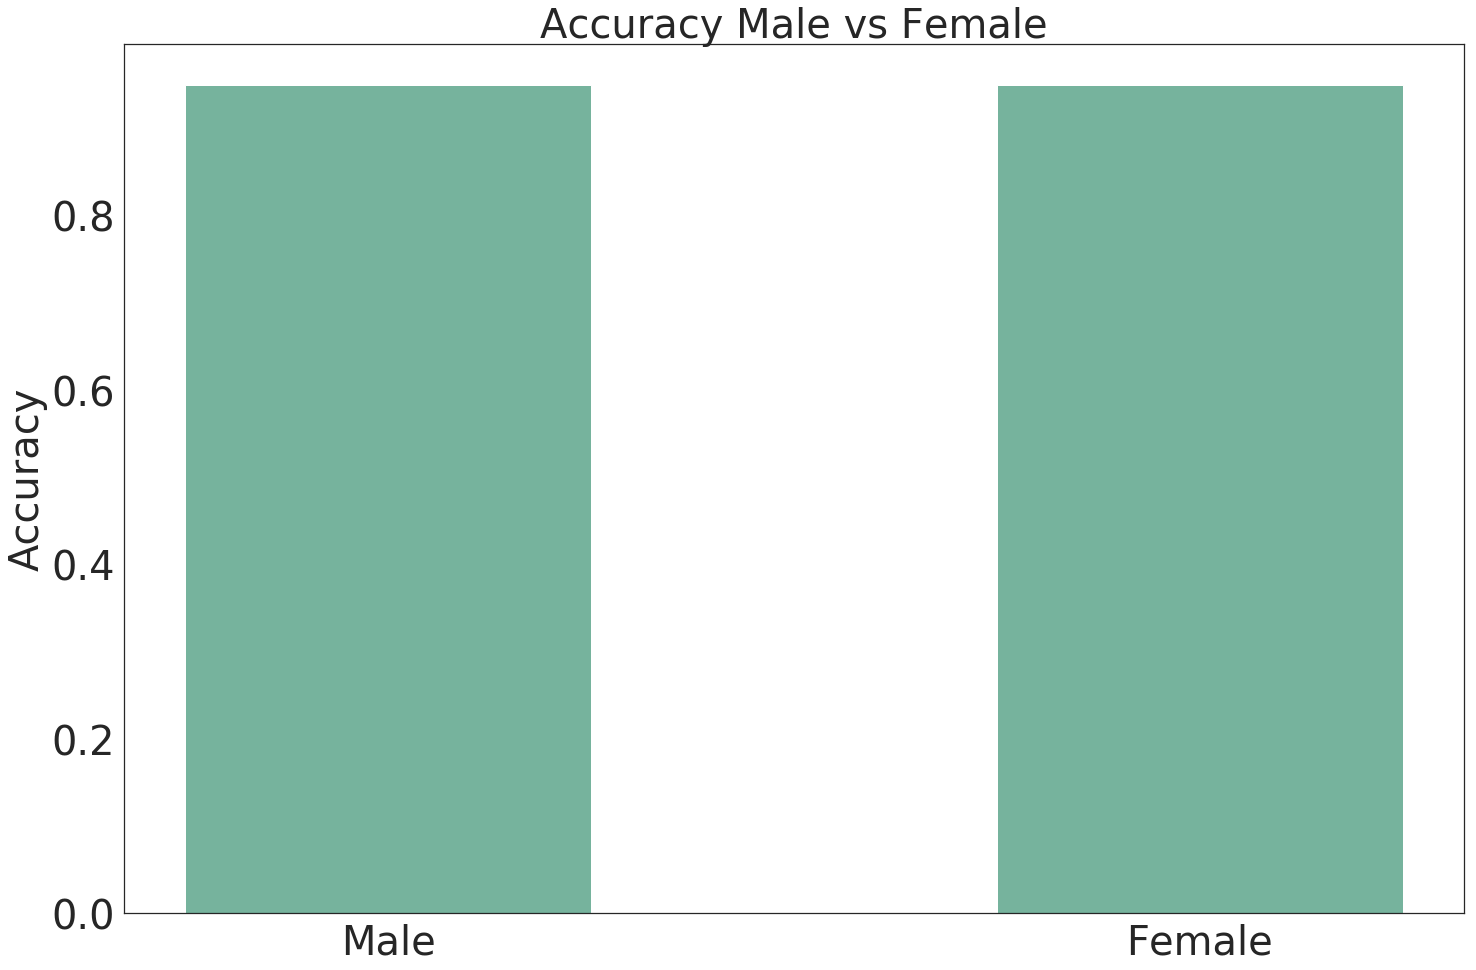

In [85]:
df = pd.read_csv('final_results_ensemble_gender.csv')
df = df[['gender_truth', 'gender_preds']]
male = df[df['gender_truth']==0]

from sklearn.metrics import accuracy_score
y_true_m, y_pred_m = male['gender_truth'], male['gender_preds']
male_acc = accuracy_score(y_true_m, y_pred_m)

female = df[df['gender_truth']==1]
y_true, y_pred = male['gender_truth'], male['gender_preds']
female_acc = accuracy_score(y_true, y_pred)


ax = plt.subplot(111)
ax.bar('Male',male_acc, width=0.5, color='#76b39d', align='center')
ax.bar('Female',female_acc, width=0.5, color='#76b39d', align='center')
ax.set_title('Accuracy Male vs Female', fontsize=40)
ax.set_ylabel("Accuracy", fontsize=40)
ax.tick_params(labelsize=40)
fig = ax.get_figure()
fig.savefig("ACC_gender.png")


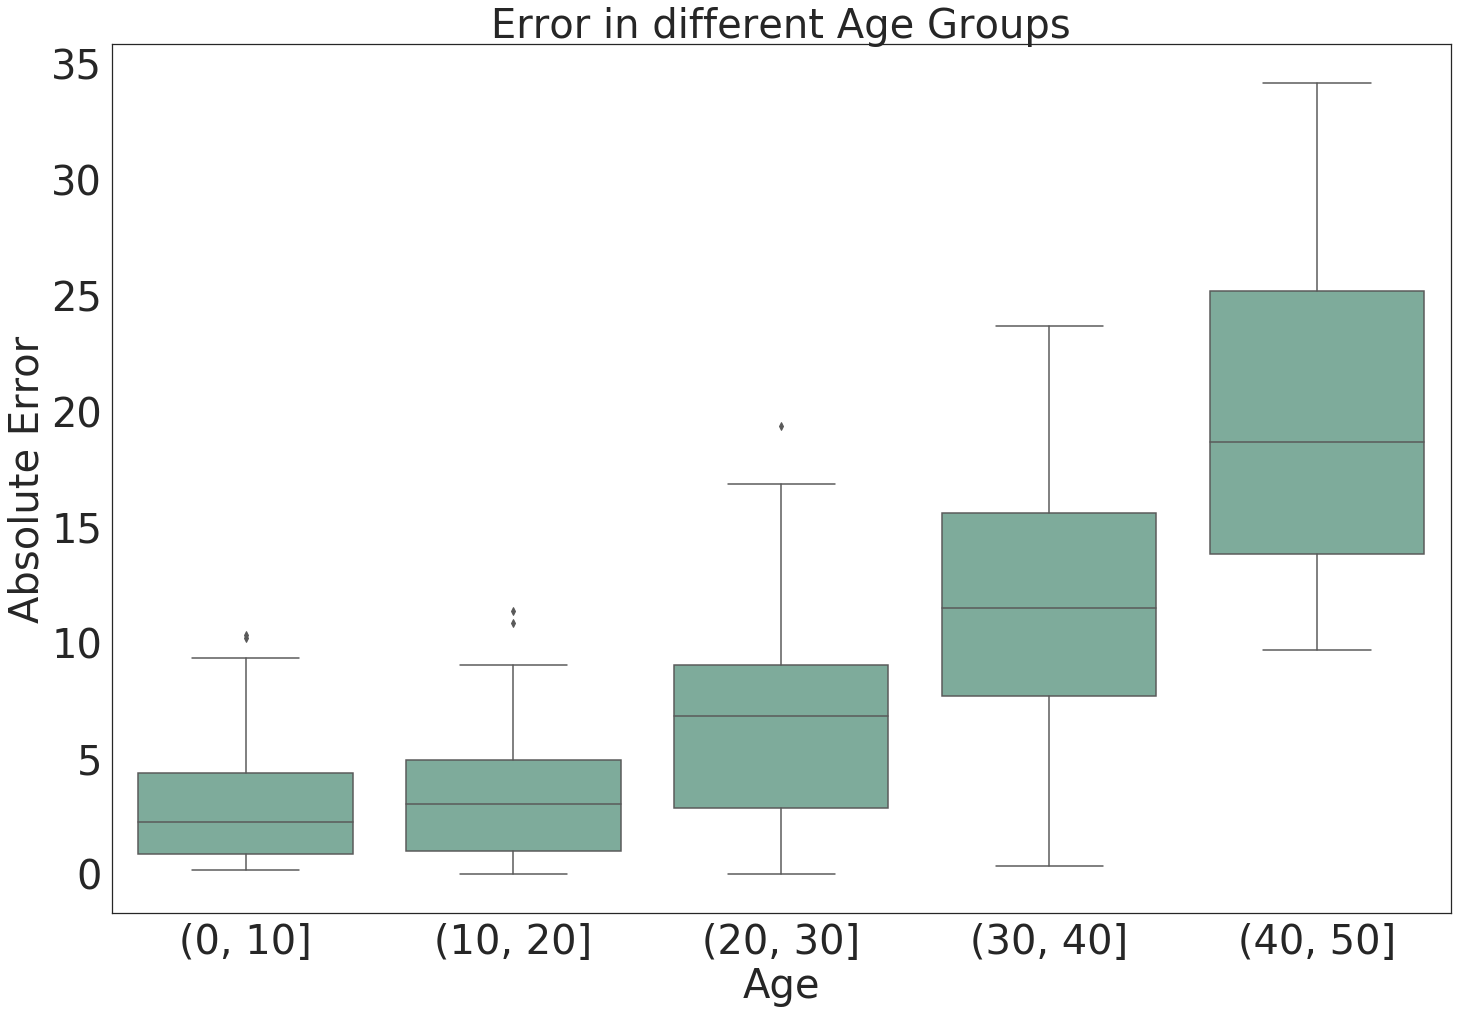

In [88]:
df = pd.read_csv('final_results_ensemble_age.csv')
import numpy as np
df= df[['age_truth', 'age_preds']]
df['MAE'] =  np.abs(df['age_truth']-df['age_preds'])
bins = [0, 10, 20, 30, 40, 50]
df['binned'] = pd.cut(df['age_truth'], bins)
import seaborn as sns
sns.set(rc={'figure.figsize': (24, 16)})
sns.set_style("white")
ax = sns.boxplot('binned', 'MAE', data = df, color='#76b39d')
ax.set_title('Error in different Age Groups', fontsize=40)
ax.set_xlabel("Age", fontsize=40)
ax.set_ylabel("Absolute Error", fontsize=40)
ax.tick_params(labelsize=40)
fig = ax.get_figure()
fig.savefig("Error_in_different_Age_Groups.png")

0.7203166226912929
0.8141025641025641
0.6811594202898551
0.8913043478260869
0.8169014084507042
0.0


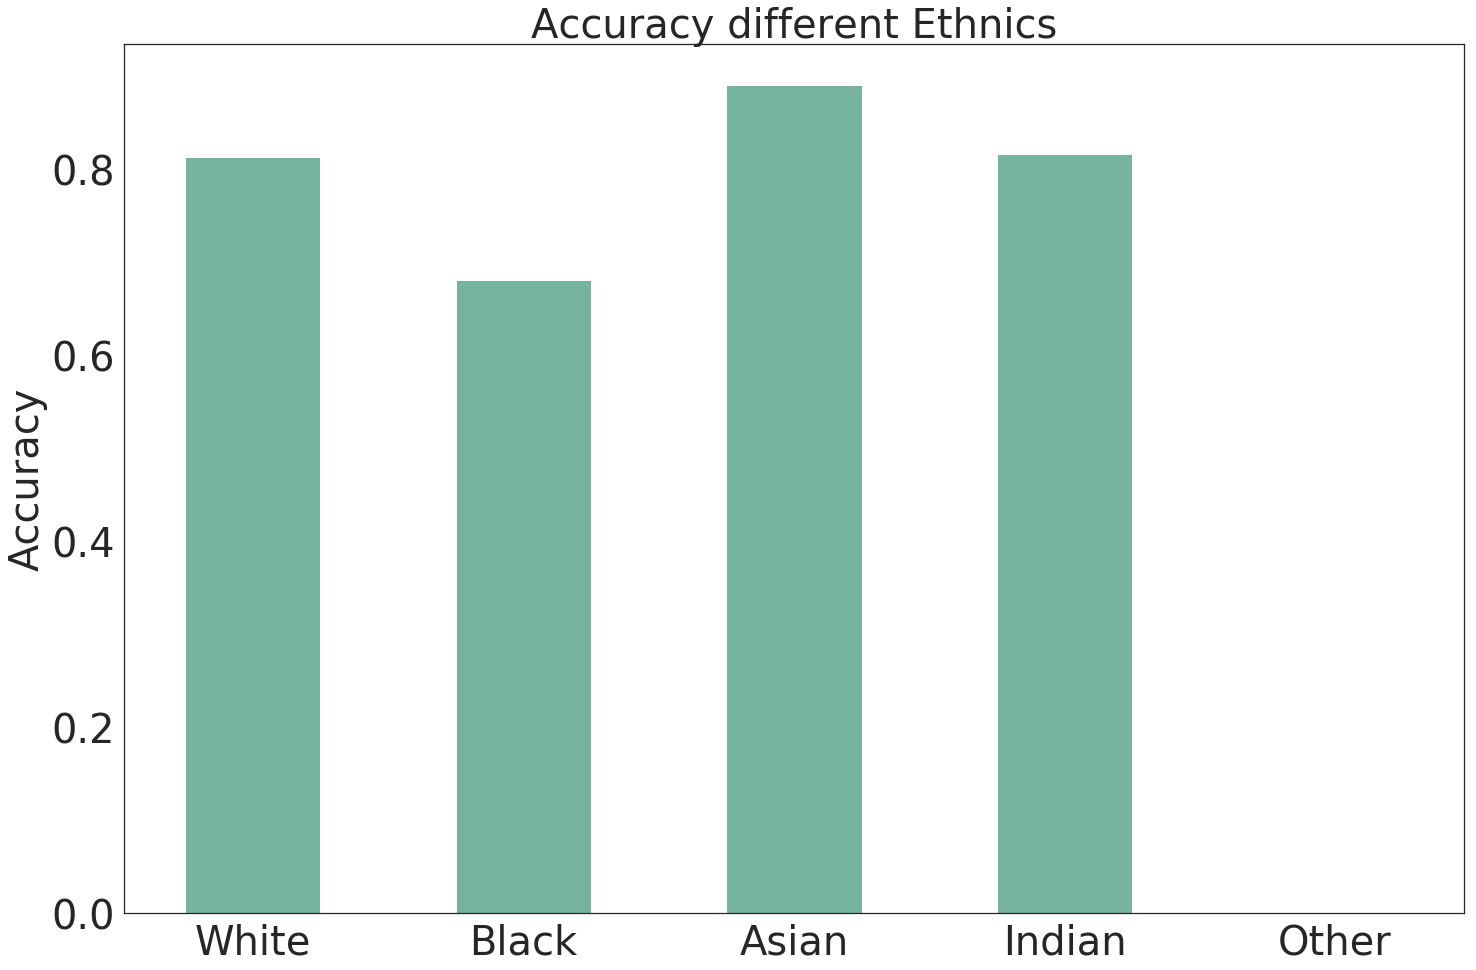

In [112]:
df = pd.read_csv('final_results_ensemble_race.csv')
df = df[['race_truth', 'race_preds']]

from sklearn.metrics import accuracy_score

y_true, y_pred = df['race_truth'], df['race_preds']
acc = accuracy_score(y_true, y_pred)
print(acc)



white = df[df['race_truth']==0]
black = df[df['race_truth']==1]
asian = df[df['race_truth']==2]
indian = df[df['race_truth']==3]
other = df[df['race_truth']==4]


from sklearn.metrics import accuracy_score
y_true_w, y_pred_w = white['race_truth'], white['race_preds']
white_acc = accuracy_score(y_true_w, y_pred_w)
print(white_acc)
y_true_b, y_pred_b = black['race_truth'], black['race_preds']
black_acc = accuracy_score(y_true_b, y_pred_b)
print(black_acc)


y_true_a, y_pred_a = asian['race_truth'], asian['race_preds']
asian_acc = accuracy_score(y_true_a, y_pred_a)
print(asian_acc)


y_true_i, y_pred_i = indian['race_truth'], indian['race_preds']
indian_acc = accuracy_score(y_true_i, y_pred_i)
print(indian_acc)


y_true_o, y_pred_o = other['race_truth'], other['race_preds']
other_acc = accuracy_score(y_true_o, y_pred_o)
print(other_acc)




ax = plt.subplot(111)
ax.bar('White',white_acc, width=0.5, color='#76b39d', align='center')
ax.bar('Black',black_acc, width=0.5, color='#76b39d', align='center')
ax.bar('Asian',asian_acc, width=0.5, color='#76b39d', align='center')
ax.bar('Indian',indian_acc, width=0.5, color='#76b39d', align='center')
ax.bar('Other',other_acc, width=0.5, color='#76b39d', align='center')

ax.set_title('Accuracy different Ethnics', fontsize=40)
ax.set_ylabel("Accuracy", fontsize=40)
ax.tick_params(labelsize=40)
fig = ax.get_figure()
fig.savefig("ACC_race.png")







              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79       156
         1.0       0.87      0.68      0.76        69
         2.0       0.60      0.89      0.72        46
         3.0       0.64      0.82      0.72        71
         4.0       0.00      0.00      0.00        37

   micro avg       0.72      0.72      0.72       379
   macro avg       0.58      0.64      0.60       379
weighted avg       0.67      0.72      0.69       379



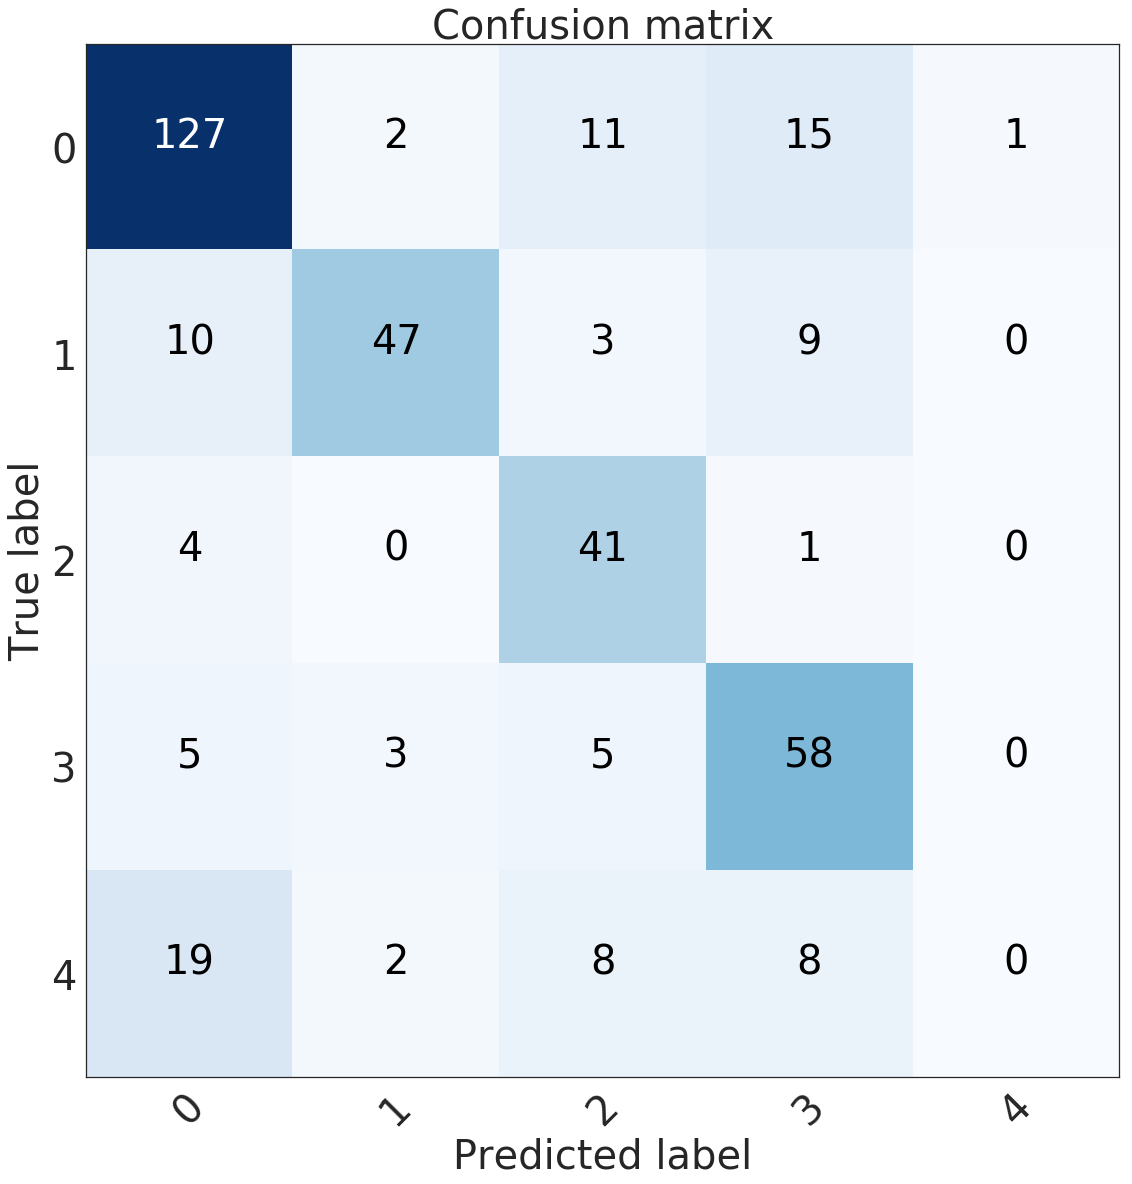

In [109]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=40)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45 , fontsize=40)
    plt.yticks(tick_marks, classes , fontsize=40)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=40)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=40)
    plt.xlabel('Predicted label', fontsize=40)
    
    plt.savefig("conf.png")


Y_true, Y_pred_classes = df['race_truth'], df['race_preds']
# compute the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(5)) 

print(classification_report(Y_true, Y_pred_classes))